In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans

In [29]:
df = pd.read_csv("iris.data",sep =',',
                              names=[
                                     "sepal_len",
                                    "sepal_wind",
                                    "petal_len",
                                    "petal_wid",
                                    "target"
                                    ], header=0)

In [30]:
print(df)

     sepal_len  sepal_wind  petal_len  petal_wid          target
0          4.9         3.0        1.4        0.2     Iris-setosa
1          4.7         3.2        1.3        0.2     Iris-setosa
2          4.6         3.1        1.5        0.2     Iris-setosa
3          5.0         3.6        1.4        0.2     Iris-setosa
4          5.4         3.9        1.7        0.4     Iris-setosa
..         ...         ...        ...        ...             ...
144        6.7         3.0        5.2        2.3  Iris-virginica
145        6.3         2.5        5.0        1.9  Iris-virginica
146        6.5         3.0        5.2        2.0  Iris-virginica
147        6.2         3.4        5.4        2.3  Iris-virginica
148        5.9         3.0        5.1        1.8  Iris-virginica

[149 rows x 5 columns]


In [31]:
df.columns

Index(['sepal_len', 'sepal_wind', 'petal_len', 'petal_wid', 'target'], dtype='object')

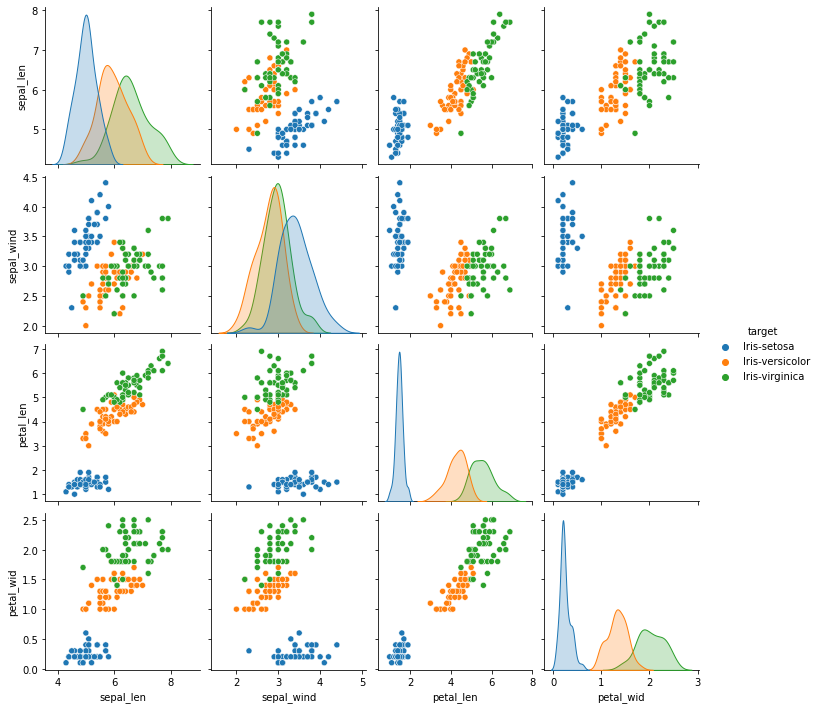

In [32]:
sb.pairplot(df, hue="target")

In [33]:
caracteristicas = np.array(df.drop('target', axis=1))

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [35]:
kmeans.fit(caracteristicas)

KMeans(n_clusters=3, random_state=0)

In [36]:
# Chute inicial sempre de 2 clusters

In [37]:
# Função para determinar a soma dos quadrados

def soma_quadrados_intra_clusters(dataset):

  wcss = []
  for n in range(2,21):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
    
  return wcss

In [38]:
# Determinando o range do gráfico que inicia com 2 clusters e vai até 21
n_clusters = list(range(2,21))

In [39]:
#Aplicando a função
soma = soma_quadrados_intra_clusters(caracteristicas)

Text(0, 0.5, 'Soma dos quadrados ontra-clusters')

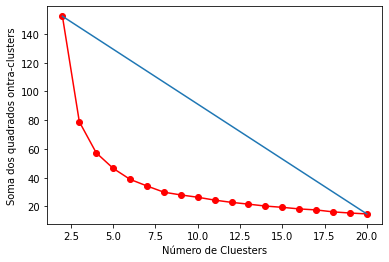

In [40]:
# Gerando o gráfico para análise, o número ótimo de cluster corresponde ao ponto mais distante do arco

plt.plot(n_clusters, soma, '-o', color="red")
plt.plot([2,20],[soma[0],soma[-1]])
plt.xlabel("Número de Cluesters")
plt.ylabel("Soma dos quadrados ontra-clusters")

In [41]:
# Função para determinar o número ótimo de clusters

def numero_otimo_clusters(wcss):
  import math
  x0=2
  y0=wcss[0]
  x1=20
  y1=wcss[-1]
  distancia = []

  for i in range(len(wcss)):
    x =i+2
    y=wcss[i]
    numerador = abs((y1-y0)*x - (x1-x0)*y+x1*y0-y1*x0)
    denominador = math.sqrt((y1-y0)**2+(x1-x0)**2)
    distancia.append(numerador/denominador)

  return distancia.index(max(distancia))+2


In [42]:
# Determiando o número ótimo de clusters
k_otimo = numero_otimo_clusters(soma)


In [43]:
print("Número ótimo de clusters: ",k_otimo)

Número ótimo de clusters:  6


In [44]:
#treinando o modelo

kmeans = KMeans(n_clusters=5, random_state=0)


In [45]:
kmeans.fit(caracteristicas)

KMeans(n_clusters=5, random_state=0)

In [46]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0,
       3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 4, 2, 2, 4, 3, 4, 2, 4, 2,
       2, 2, 0, 2, 2, 2, 4, 4, 0, 2, 0, 4, 0, 2, 4, 0, 0, 2, 4, 4, 4, 2,
       0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [47]:
# Determinando o resultado da classificação

y_classificacao = kmeans.predict(caracteristicas)

In [48]:
# criando a coluna de classificação no df com o resultado

df['classe'] = y_classificacao

In [49]:
df.head()

,sepal_len,sepal_wind,petal_len,petal_wid,target,classe
0,4.9,3.0,1.4,0.2,Iris-setosa,1
1,4.7,3.2,1.3,0.2,Iris-setosa,1
2,4.6,3.1,1.5,0.2,Iris-setosa,1
3,5.0,3.6,1.4,0.2,Iris-setosa,1
4,5.4,3.9,1.7,0.4,Iris-setosa,1
